In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.utils import to_categorical

#指定亂數種子
seed = 10
np.random.seed(seed)

In [2]:
#載入Reuters Dataset
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = top_words)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(X_train)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [ ]:
#資料預處理
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

In [ ]:
#One-hot Encoding
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)

In [ ]:
#定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Dropout(0.75))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(46, activation = 'softmax'))
model.summary() #show model information

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 338,158
Trainable params: 338,158
Non-trainable params: 0
__________________________________________________

In [ ]:
#編譯模型
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop",
      metrics = ["accuracy"])

In [ ]:
#訓練模型
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 40, batch_size = 32, verbose = 2)

Epoch 1/40
225/225 - 13s - loss: 2.3735 - accuracy: 0.3979 - val_loss: 1.8646 - val_accuracy: 0.4903
Epoch 2/40
225/225 - 4s - loss: 1.9156 - accuracy: 0.4987 - val_loss: 1.7377 - val_accuracy: 0.5353
Epoch 3/40
225/225 - 4s - loss: 1.8022 - accuracy: 0.5175 - val_loss: 1.7547 - val_accuracy: 0.5253
Epoch 4/40
225/225 - 4s - loss: 1.7625 - accuracy: 0.5275 - val_loss: 1.7233 - val_accuracy: 0.5292
Epoch 5/40
225/225 - 4s - loss: 1.7122 - accuracy: 0.5372 - val_loss: 1.6363 - val_accuracy: 0.5620
Epoch 6/40
225/225 - 4s - loss: 1.6880 - accuracy: 0.5432 - val_loss: 1.7008 - val_accuracy: 0.5454
Epoch 7/40
225/225 - 4s - loss: 1.6482 - accuracy: 0.5587 - val_loss: 1.6019 - val_accuracy: 0.5671
Epoch 8/40
225/225 - 4s - loss: 1.6220 - accuracy: 0.5712 - val_loss: 1.6472 - val_accuracy: 0.5632
Epoch 9/40
225/225 - 4s - loss: 1.5706 - accuracy: 0.5756 - val_loss: 1.5843 - val_accuracy: 0.5787
Epoch 10/40
225/225 - 4s - loss: 1.5457 - accuracy: 0.5936 - val_loss: 1.5087 - val_accuracy: 0.603

In [ ]:
#評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print("測試準確度 = {:.2f}".format(accuracy))

測試準確度 = 0.70


In [ ]:
#show train and validation diagram
import matplotlib.pyplot as plt

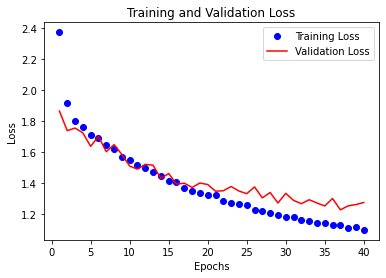

In [ ]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

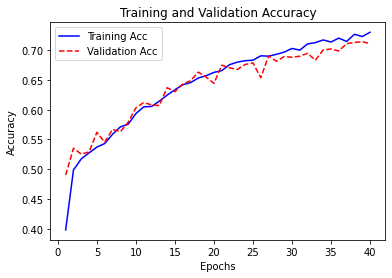

In [ ]:
#show train and validation diagram
acc = history.history["accuracy"]
epochs = range(1, len(acc) + 1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label = "Training Acc")
plt.plot(epochs, val_acc, "r--", label = "Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()